In [1]:
import tensorflow as tf
#import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

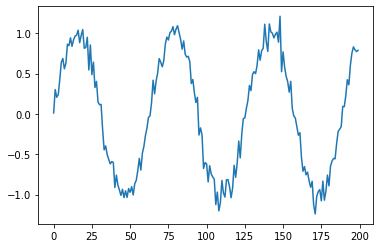

In [3]:
series = np.sin(0.1*np.arange(200))+ np.random.randn(200)*0.1 # with noise 
plt.plot(series)
plt.show()

In [4]:
T = 10 # we will use 10 previous values to predict the next value
X = [] # input shape N x T x D for neueral networks, for Lr - N x T or N x D as D = 1 
# so X shape will be N x 10, N = L-T = 190, so with x values 190-199, we predict 200th value which would be yhat 
Y = [] # for x1-x10, y - x11, x2-x11, y-x12,.... x190-x199, y - x200 , so y shape is x11----x200, 190 x 1 i.e., 190 x 1
for i in range(len(series)-T):
    x = series[i:i+T] # stores x2-x11
    X.append(x)
    y = series[i+T]
    Y.append(y)

X = np.array(X).reshape(-1,T,1) #creates N x T array for linear, and N x T x D for LSTM's and GRU's
Y = np.array(Y) # creates an array of size N
print(X.shape, Y.shape)

(190, 10, 1) (190,)


In [45]:
##try LSTM model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(T,1)))
model.add(tf.keras.layers.LSTM(50))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer=Adam(0.005), loss='mse')


In [46]:
##try SimpleRNN model

#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Input(shape=(T,1)))
#model.add(tf.keras.layers.SimpleRNN(50))
#model.add(tf.keras.layers.Dense(1))
#model.compile(optimizer=Adam(0.01), loss='mse')


In [47]:
### try autoregressive linear model

#i = Input(shape=(T,))
#x = Dense(1)(i)
#model = Model(i, x)
#model.compile(
#  loss='mse',
#  optimizer=Adam(lr=0.1),
#)

#r = model.fit(
#  X[:-N//2], Y[:-N//2],
#  epochs=80,
#  validation_data=(X[-N//2:], Y[-N//2:]),
#)

In [48]:
N = len(X)
#r = model.fit(X[0:96,:],Y[0:96], validation_data= (X[96:-1,:],Y[96:-1]),  epochs=80)
r = model.fit(X[:-int(N/2)],Y[:-int(N/2)], validation_data= (X[-int(N/2):],Y[-int(N/2):]),  epochs=100)
# our model trains on first half of data set and validates on second half of data set

Epoch 1/100
3/3 [==============================] - 0s 144ms/step - loss: 0.3328 - val_loss: 0.1848
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.1760 - val_loss: 0.1517
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.1268 - val_loss: 0.1274
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.1048 - val_loss: 0.1019
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0875 - val_loss: 0.0763
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0569 - val_loss: 0.0530
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0435 - val_loss: 0.0372
Epoch 8/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0255 - val_loss: 0.0312
Epoch 9/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0194 - val_loss: 0.0197
Epoch 10/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0163 - val_loss: 0.0228
Epoch 11/100
3/3 [

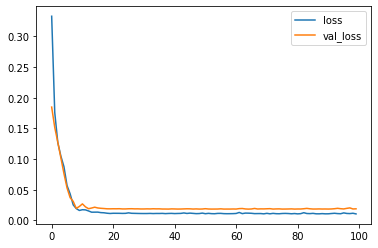

In [49]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [50]:
#N = len(X)
val_predictions = []
val_target = Y[-int(N/2):]
x_last = X[-int(N/2)]

In [51]:
while len(val_predictions)<len(val_target):
      p = model.predict(x_last.reshape(1,-1, 1))[0,0]
      # for predictions, we cant use the future values, so we can only use the predicted values
      # p gives prediction for x[100] i.e., yhat[100], now assign x[101] with yhat[100]
      # then use x[91] ... x[101] to predict y[101]
      val_predictions.append(p)
      x_last = np.roll(x_last, -1)
      x_last[-1] = p
      #[1,2,3,...10] --> [2,3,...10,1]--> [2,3,...10,p=x[11]]
      #So shift or roll by minus 1 means shift everything one spot to the left the left most value ends up
      #looping back around to the right.But we replace it anyway with P the latest prediction.
      #So that's how we update the variable last X with our latest forecast prediction.

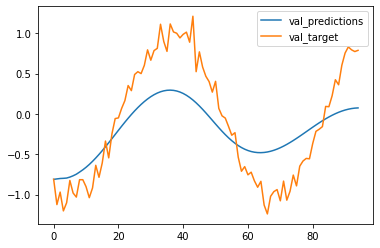

In [52]:
plt.plot(val_predictions, label='val_predictions')
plt.plot(val_target, label='val_target')
plt.legend()